In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# XGBoost model
#-------------------------------------------------------
import xgboost as xgb
from xgboost import XGBClassifier

# LGBM model
#-------------------------------------------------------
import lightgbm
from lightgbm import LGBMClassifier

# SVM model
#-------------------------------------------------------
from sklearn.svm import SVC

# model evaluation
#-------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, recall_score, f1_score, accuracy_score

# for PCA
#-------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA





import warnings
warnings.simplefilter('ignore')

In [2]:
df0 = pd.read_csv('data/MIR_Fruit_purees.csv')

In [3]:
df0

,Wavenumbers,NON-Strawberry,NON-Strawberry.1,NON-Strawberry.2,NON-Strawberry.3,NON-Strawberry.4,NON-Strawberry.5,NON-Strawberry.6,NON-Strawberry.7,NON-Strawberry.8,...,NON-Strawberry.622,NON-Strawberry.623,NON-Strawberry.624,NON-Strawberry.625,NON-Strawberry.626,NON-Strawberry.627,NON-Strawberry.628,NON-Strawberry.629,NON-Strawberry.630,NON-Strawberry.631
0,899.327,0.002806,0.002637,0.002416,0.002345,0.002303,0.002514,0.002105,0.002018,0.002154,...,0.002539,0.002569,0.002723,0.002542,0.002627,0.002631,2.730378e-03,0.002713,0.002697,0.002789
1,903.187,0.002732,0.002638,0.002480,0.002292,0.002342,0.002488,0.002078,0.001999,0.002165,...,0.002507,0.002569,0.002714,0.002539,0.002629,0.002651,2.838751e-03,0.002779,0.002905,0.003040
2,907.047,0.002661,0.002651,0.002511,0.002249,0.002350,0.002477,0.002077,0.001945,0.002191,...,0.002483,0.002541,0.002740,0.002574,0.002619,0.002696,2.999267e-03,0.002877,0.003277,0.003359
3,910.907,0.002657,0.002757,0.002611,0.002303,0.002419,0.002542,0.002154,0.001964,0.002275,...,0.002563,0.002599,0.002861,0.002664,0.002714,0.002809,3.258967e-03,0.003085,0.003711,0.003796
4,914.767,0.002699,0.003000,0.002802,0.002466,0.002561,0.002713,0.002311,0.002083,0.002470,...,0.002764,0.002806,0.003090,0.002829,0.002939,0.003022,3.649444e-03,0.003419,0.004265,0.004394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1787.124,0.000087,-0.000006,0.000062,0.000075,0.000099,0.000054,0.000064,0.000102,0.000081,...,0.000004,0.000008,0.000008,0.000005,0.000012,-0.000001,-7.710620e-07,0.000007,-0.000009,-0.000020
231,1790.984,0.000046,0.000002,0.000031,0.000043,0.000054,0.000031,0.000043,0.000064,0.000055,...,0.000007,0.000018,0.000010,0.000007,0.000012,0.000003,2.049950e-07,0.000007,-0.000005,-0.000006
232,1794.844,0.000011,0.000010,0.000009,0.000021,0.000020,0.000016,0.000027,0.000038,0.000033,...,0.000014,0.000014,0.000015,0.000013,0.000010,0.000007,6.586780e-06,0.000012,-0.000002,-0.000005
233,1798.704,0.000009,0.000005,0.000007,0.000008,0.000012,0.000008,0.000012,0.000015,0.000014,...,0.000011,0.000011,0.000010,0.000010,0.000006,0.000008,5.125220e-06,0.000013,0.000001,-0.000002


In [4]:
df_plot = pd.melt(df0, ['Wavenumbers'])
df_plot.loc[df_plot['variable'].str.contains('NON'),'target']='adulterated samples'
df_plot.loc[~df_plot['variable'].str.contains('NON'),'target']='un-adulterated samples'

In [5]:


#sns.lineplot(df_plot, x='Wavenumbers', y='value', hue='target')
#plt.xlabel("Wavenumber (1/cm)")
#plt.ylabel("a.u.")


#plt.show()

In [6]:
df_plot.query("target=='adulterated samples'")

,Wavenumbers,variable,value,target
0,899.327,NON-Strawberry,0.002806,adulterated samples
1,903.187,NON-Strawberry,0.002732,adulterated samples
2,907.047,NON-Strawberry,0.002661,adulterated samples
3,910.907,NON-Strawberry,0.002657,adulterated samples
4,914.767,NON-Strawberry,0.002699,adulterated samples
...,...,...,...,...
231000,1787.124,NON-Strawberry.631,-0.000020,adulterated samples
231001,1790.984,NON-Strawberry.631,-0.000006,adulterated samples
231002,1794.844,NON-Strawberry.631,-0.000005,adulterated samples
231003,1798.704,NON-Strawberry.631,-0.000002,adulterated samples


TypeError: 24 must be a sequence

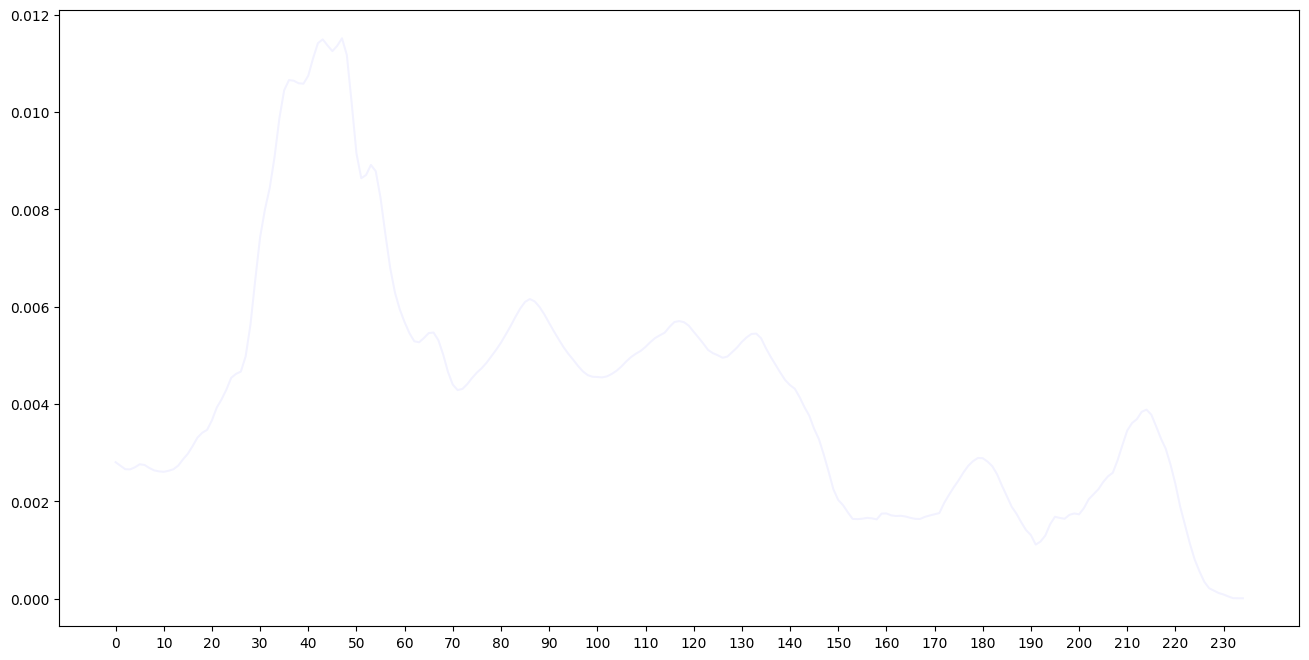

In [77]:
fig, ax = plt.subplots(figsize=[16, 8])
sample_measurement = []
sns_blue = sns.color_palette(as_cmap=True)
k = list(df_plot['Wavenumbers'].unique())

for sample, measurement in df_plot.query("target=='adulterated samples'").groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="blue")
    plt.xticks(ticks=np.arange(0, 235, 10), labels=len(np.arange(900, 1800, 38)))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="blue", label="adulterated samples", legend=True
)


sns_blue = sns.color_palette("flare", as_cmap=True)
for sample, measurement in df_plot.query("target=='un-adulterated samples'").groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="red")
    plt.xticks(ticks=np.arange(0, 235, 10), labels=len(np.arange(900, 1800, 38)))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="red", label="un-adulterated samples", legend=True
)


ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of adulaterated samples VS. un-adultarated samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

Reshape the data so that it can be used in the classifier models

In [8]:
df = df0.T

df.columns = df0['Wavenumbers']

df = df.drop('Wavenumbers', axis=0)

df = df.reset_index()
df.index.names=['index']
df.loc[df['index'].str.contains('NON'),'target']=1
df.loc[~df['index'].str.contains('NON'),'target']=0
df = df.drop(['index'], axis=1)

print('Targets:')
print('1.0 is adultarated!')
print('0.0 is pure!')
print(df.target.value_counts())
X = df.drop(['target'], axis=1)
y = df['target']

#del df

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=777, test_size=0.3)

Targets:
1.0 is adultarated!
0.0 is pure!
target
1.0    632
0.0    351
Name: count, dtype: int64


In [9]:
X

Wavenumbers,899.327,903.187,907.047,910.907,914.767,918.627,922.487,926.347,930.207,934.067,...,1767.824,1771.684,1775.544,1779.404,1783.264,1787.124,1790.984,1794.844,1798.704,1802.564
index,,,,,,,,,,,,,,,,,,,,,
0,0.002806,0.002732,0.002661,0.002657,0.002699,0.002762,0.002749,0.002686,0.002637,0.002617,...,0.000562,0.000348,0.000216,1.661050e-04,0.000117,8.704010e-05,4.584810e-05,0.000011,0.000009,0.000009
1,0.002637,0.002638,0.002651,0.002757,0.003000,0.003313,0.003412,0.003302,0.003162,0.003060,...,0.000022,0.000013,0.000006,-4.961040e-06,-0.000005,-5.507340e-06,1.840890e-06,0.000010,0.000005,0.000005
2,0.002416,0.002480,0.002511,0.002611,0.002802,0.003031,0.003235,0.003316,0.003257,0.003136,...,0.000449,0.000290,0.000185,1.367420e-04,0.000090,6.222180e-05,3.113240e-05,0.000009,0.000007,0.000007
3,0.002345,0.002292,0.002249,0.002303,0.002466,0.002642,0.002703,0.002671,0.002618,0.002567,...,0.000613,0.000419,0.000267,1.790760e-04,0.000119,7.520990e-05,4.297120e-05,0.000021,0.000008,0.000008
4,0.002303,0.002342,0.002350,0.002419,0.002561,0.002737,0.002862,0.002860,0.002811,0.002750,...,0.000713,0.000468,0.000299,2.123230e-04,0.000140,9.875530e-05,5.373010e-05,0.000020,0.000012,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,0.002631,0.002651,0.002696,0.002809,0.003022,0.003262,0.003372,0.003315,0.003181,0.003046,...,0.000078,0.000038,0.000010,-9.861050e-07,-0.000004,-1.267690e-06,2.972400e-06,0.000007,0.000008,0.000000
979,0.002730,0.002839,0.002999,0.003259,0.003649,0.004125,0.004538,0.004758,0.004682,0.004419,...,0.000066,0.000038,0.000018,6.989320e-06,0.000003,-7.710620e-07,2.049950e-07,0.000007,0.000005,0.000000
980,0.002713,0.002779,0.002877,0.003085,0.003419,0.003837,0.004176,0.004298,0.004191,0.003981,...,0.000134,0.000084,0.000046,2.805840e-05,0.000011,6.590380e-06,6.814360e-06,0.000012,0.000013,0.000000


In [10]:
y

index
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
978    1.0
979    1.0
980    1.0
981    1.0
982    1.0
Name: target, Length: 983, dtype: float64

In [11]:
def run_LGBM_model(X_train, X_test, y_train, y_test):
    model = LGBMClassifier(verbose=-1) #scale_pos_weight=
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, y_pred))
    print('f1: ', f1_score(y_test, y_pred))
    print('roc_auc: ',roc_auc_score(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

def run_XGB_model(X_train, X_test, y_train, y_test):
    model = XGBClassifier(verbosity=None) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, y_pred))
    print('f1: ', f1_score(y_test, y_pred))
    print('roc_auc: ',roc_auc_score(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    
def run_SVM_model(X_train, X_test, y_train, y_test):
    model = SVC(kernel='rbf', C=200.0)  #scale_pos_weight=
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, y_pred))
    print('f1: ', f1_score(y_test, y_pred))
    print('roc_auc: ',roc_auc_score(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()    
    


accuracy:  0.9627118644067797
recall:  0.968421052631579
f1:  0.9709762532981532
roc_auc:  0.9604010025062656


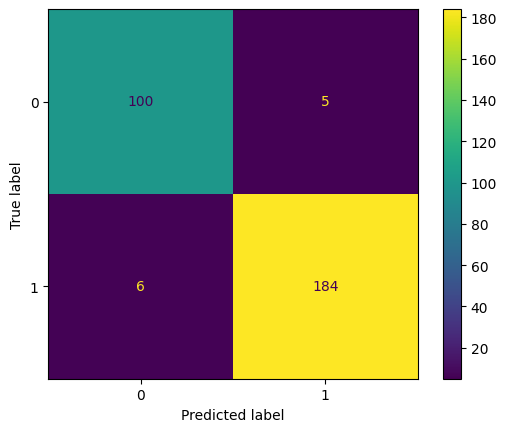

In [12]:
run_LGBM_model(X_train, X_test, y_train, y_test)

accuracy:  0.9661016949152542
recall:  0.9578947368421052
f1:  0.9732620320855614
roc_auc:  0.969423558897243


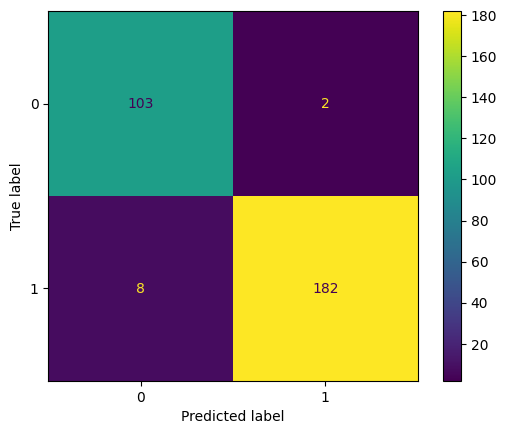

In [13]:
run_XGB_model(X_train, X_test, y_train, y_test)

accuracy:  0.9525423728813559
recall:  0.9368421052631579
f1:  0.9621621621621621
roc_auc:  0.9588972431077694


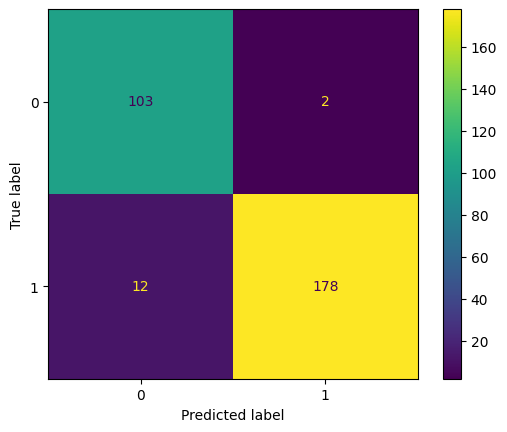

In [14]:
run_SVM_model(X_train, X_test, y_train, y_test)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(data=X_train_scaled,columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(data=X_test_scaled,columns=X_test.columns)

In [16]:
pca = PCA(n_components=20)

In [17]:
X_train_scaled_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))
X_train_scaled_pca.columns = ['PCA_'+str(col) for col in X_train_scaled_pca.columns]

X_test_scaled_pca = pd.DataFrame(pca.transform(X_test_scaled))
X_test_scaled_pca.columns = ['PCA_'+str(col) for col in X_test_scaled_pca.columns]

In [18]:
corr = X_train_scaled_pca.corr()
corr.style.background_gradient(cmap='coolwarm')

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19
PCA_0,1.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
PCA_1,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
PCA_2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
PCA_3,-0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000
PCA_4,-0.000000,-0.000000,0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000
PCA_5,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000
PCA_6,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
PCA_7,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
PCA_8,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
PCA_9,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000


accuracy:  0.9830508474576272
recall:  0.9894736842105263
f1:  0.9868766404199475
roc_auc:  0.9804511278195489


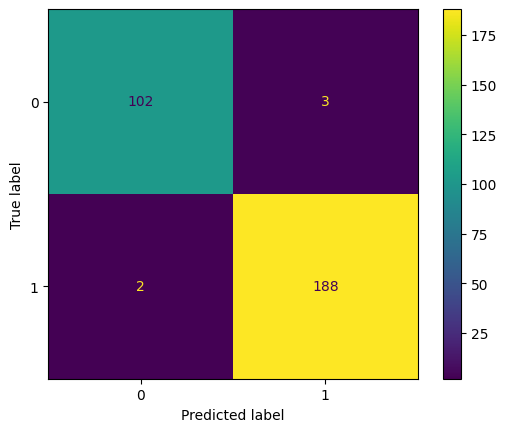

In [19]:
run_LGBM_model(X_train_scaled_pca, X_test_scaled_pca, y_train, y_test)

accuracy:  0.9627118644067797
recall:  0.9631578947368421
f1:  0.9708222811671088
roc_auc:  0.962531328320802


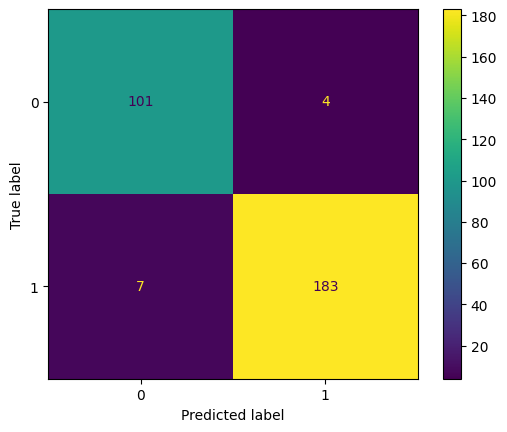

In [20]:
run_XGB_model(X_train_scaled_pca, X_test_scaled_pca, y_train, y_test)

In [21]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf

2024-02-07 21:47:39.115035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 21:47:39.115111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 21:47:39.155825: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-07 21:47:39.255641: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-07 21:47:40.962185: W tensorflow/compiler/tf2

In [22]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_train_scaled_pca.merge(y_train.reset_index(drop=True), left_index=True, right_index=True), label='target')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X_test_scaled_pca.merge(y_test.reset_index(drop=True), left_index=True, right_index=True), label='target')

In [23]:
# Specify the model.
model= tfdf.keras.GradientBoostedTreesModel(
    num_trees=25,
    growing_strategy="BEST_FIRST_GLOBAL",
    max_depth=4,
    split_axis="SPARSE_OBLIQUE",
    categorical_algorithm="RANDOM",
    )

# add evaluation metrics.
model.compile(
      metrics=['accuracy'])

Use /tmp/tmplm_4hgjv as temporary training directory


[WARNING 24-02-07 21:47:43.0451 CET gradient_boosted_trees.cc:1886] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-02-07 21:47:43.0458 CET gradient_boosted_trees.cc:1897] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-02-07 21:47:43.0459 CET gradient_boosted_trees.cc:1911] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [24]:
model.fit(x=train_ds, validation_data=test_ds)

Reading training dataset...
Training dataset read in 0:00:05.127946. Found 688 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(295, shape=(), dtype=int32)
Validation dataset read in 0:00:00.675885. Found 295 examples.
Training model...
Model trained in 0:00:01.031868
Compiling model...


[INFO 24-02-07 21:47:49.9290 CET kernel.cc:1233] Loading model from path /tmp/tmplm_4hgjv/model/ with prefix 7a58570c9ba14027
[INFO 24-02-07 21:47:49.9315 CET decision_forest.cc:660] Model loaded with 25 root(s), 675 node(s), and 20 input feature(s).
[INFO 24-02-07 21:47:49.9315 CET abstract_model.cc:1344] Engine "GradientBoostedTreesGeneric" built
[INFO 24-02-07 21:47:49.9315 CET kernel.cc:1061] Use fast generic engine


Model compiled.


In [25]:
# Predicting class on test dataset
predictionsClass = (model.predict(test_ds) > 0.5).astype("int32")

# Extract labels tensor from tensorflow dataset and convert it to numpy
XTensor, labelsTensor = tuple(zip(*test_ds))
# X = np.array(XTensor)
labelsArr = np.array(labelsTensor)
labelsArr = np.reshape(labelsArr, (labelsArr.size,))

# Extract predictions list from results of the model and convert it to numpy
predictionsArr = np.array([predictionsClass[i][0] for i in range(len(predictionsClass))])

1/1 [==============================] - 0s 90ms/step


In [26]:
# Initializing the input tensor from numpy arrays
labels = tf.constant(labelsArr,dtype = tf.int32)
predictions = tf.constant(predictionsArr,dtype = tf.int32)
 
# Printing the input tensor
print('Labels: ',labels)
print('Predictions: ',predictions)
 
# Evaluating confusion matrix
res = tf.math.confusion_matrix(labels, predictions)
 
# Printing the result
print('\n----------------------\n')
print('Confusion_matrix: \n')
print(res)

Labels:  tf.Tensor(
[1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0
 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1
 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1
 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0], shape=(295,), dtype=int32)
Predictions:  tf.Tensor(
[1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0
 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1
 0 1 0 1 0 1 1 0 1 1 0 0 1 0

accuracy:  0.9728813559322034
recall:  0.9842105263157894
f1:  0.9790575916230367
roc_auc:  0.9682957393483708


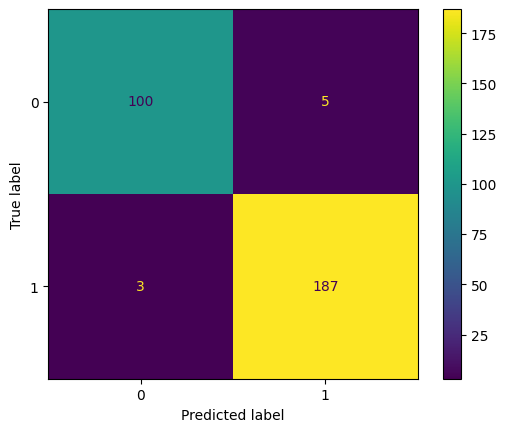

In [27]:
run_SVM_model(X_train_scaled_pca, X_test_scaled_pca, y_train, y_test)

### 98% accuracy and 99% recall from the LightGBM classifier after reducing the high number of Wavenumber bins (235) to 20 uncorrelated components. 